In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statistics import variance, stdev  # for performing statitistics analysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-status-prediction/loan_data.csv


In [29]:

df = pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


**Data Sanity Checks**

In [30]:
df.shape

(381, 13)

- The shape of data is 381 rows and 13 columns.

In [31]:
# checking missing values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

 the columns with missing values include:
*  Gender                5
*  Dependents            8
*  Self_Employed        21
*  Loan_Amount_Term     11
*  Credit_History       30

 

In [32]:
# checking duplicates
df.duplicated().sum()


0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


the data sets have the follwoing dtypes
* float 4 columns
* Int 1 column
* Objects 8 columns

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [35]:
# object columns
df.describe(include = 'object').T

,count,unique,top,freq
Loan_ID,381,381,LP001003,1
Gender,376,2,Male,291
Married,381,2,Yes,228
Dependents,373,4,0,234
Education,381,2,Graduate,278
Self_Employed,360,2,No,325
Property_Area,381,3,Semiurban,149
Loan_Status,381,2,Y,271


**Univeriate Analysis**

In [36]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

Property Area is divided into 3:
* Semiurban   
* Urban        
* Rural 

In [37]:
df['Education'].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

Education is divided into 
* Graduate        
* Not Graduate    

In [38]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

Divided into 
* 0     234
* 2      59
* 1      52
* 3+     28

3+ 

In [39]:
df['Loan_Status'].value_counts()

#independent variable

Loan_Status
Y    271
N    110
Name: count, dtype: int64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'A plot showing distribution of loan amount term')

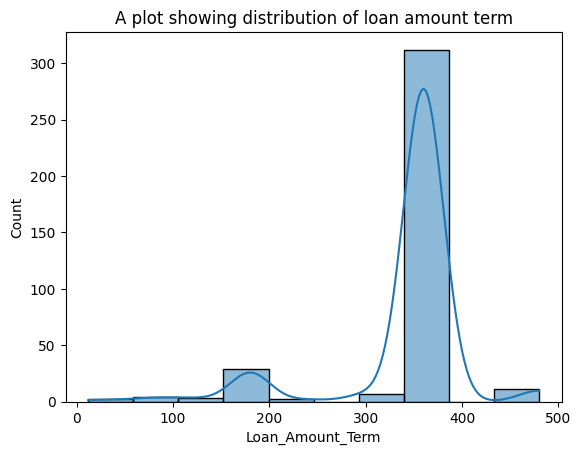

In [41]:
sns.histplot(df, x = 'Loan_Amount_Term', kde=True)
plt.title('A plot showing distribution of loan amount term')

In [42]:
medin = df['Loan_Amount_Term'].median()
medin

360.0

In [43]:
med = df['Loan_Amount_Term'].mean()
med

340.86486486486484

In [44]:
med2 = np.nanmedian(df['Loan_Amount_Term'])
med2

360.0

In [45]:
mod = df['Loan_Amount_Term'].mode()
mod

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [46]:
#filling the missing values

df.fillna({'Loan_Amount_Term': med}, inplace = True)

df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Credit history')

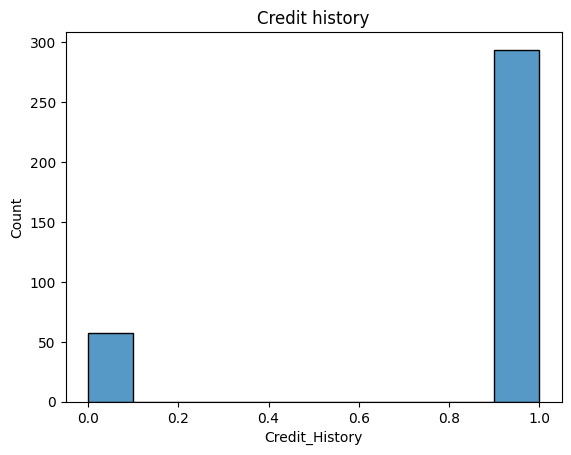

In [47]:
sns.histplot(df, x = 'Credit_History')
plt.title('Credit history')

In [48]:
med_cred = df['Credit_History'].median()
med_cred

1.0

In [50]:
med_cred = df['Credit_History'].mean()
med_cred

0.8376068376068376

In [49]:
med_cred = df['Credit_History'].mode()
med_cred

0    1.0
Name: Credit_History, dtype: float64

In [51]:
#filling the missing values

df.fillna({'Credit_History': med_cred}, inplace = True)

df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
med_cred = df['Credit_History'].median()

# Fill missing values in Credit_History column with the median
df['Credit_History'].fillna(med_cred, inplace=True)

# Check for null values after filling
print(df.isnull().sum())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


/tmp/ipykernel_33/3681435685.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(med_cred, inplace=True)


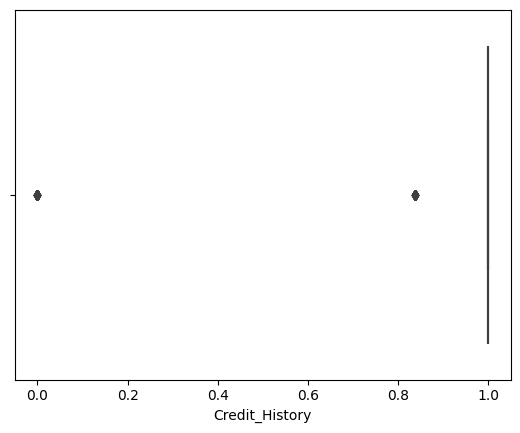

In [60]:
sns.boxplot(df, x= 'Credit_History')
plt.show()


In [55]:
q1 = df['LoanAmount'].quantile(0.25)
print(q1)
q3 = df['LoanAmount'].quantile(0.25)
print(q3)

90.0
90.0


In [58]:
IQR = q3 - q1
print(IQR)


0.0


In [59]:
q1 - 1.5* IQR #lower boundary

q3 + 1.5 * IQR # upper boundary

print(q1)
print(q3)

90.0
90.0


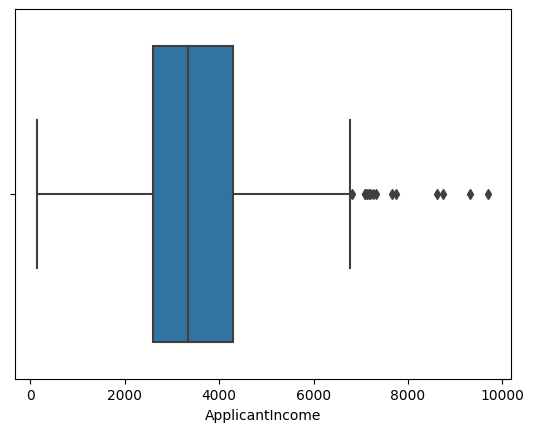

In [61]:
# ApplicantIncome
sns.boxplot(df, x= 'ApplicantIncome')
plt.show()

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,381.0,340.864865,67.549811,12.0,360.0,360.0,360.0,480.0
Credit_History,381.0,0.837607,0.354459,0.0,1.0,1.0,1.0,1.0


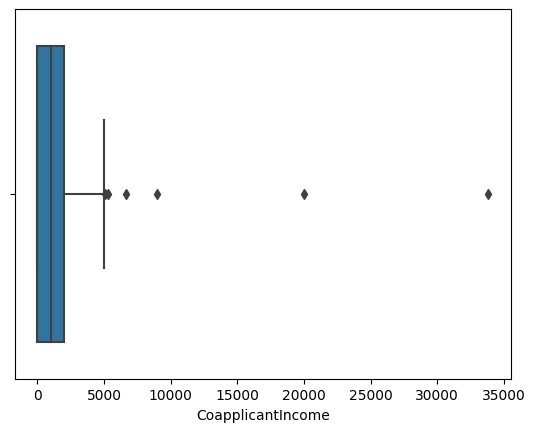

In [63]:
sns.boxplot(df, x= 'CoapplicantIncome')
plt.show()

In [66]:
outliers = df[df['LoanAmount'] < q1 ] #| df['LoanAmount'] > q3]
print(outliers)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001005    Male     Yes          0      Graduate           Yes   
5    LP001024    Male     Yes          2      Graduate            No   
8    LP001030    Male     Yes          2      Graduate            No   
11   LP001036  Female      No          0      Graduate            No   
19   LP001086    Male      No          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
369  LP002917  Female      No          0  Not Graduate            No   
372  LP002928    Male     Yes          0      Graduate            No   
375  LP002943    Male      No        NaN      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               3000                0.0        66.0           

In [ ]:
lower_boundary = q1 - 1.5 * IQR

print(lower_boundary)

upper_boundary = q3 + 1.5 * IQR

print(upper_boundary)

In [71]:

lower_boundary = q1 - 1.5 * IQR

print(lower_boundary)

upper_boundary = q3 + 1.5 * IQR

print(upper_boundary)
outliers2 = df[(df['LoanAmount'] < lower_boundary) | (df['LoanAmount'] > upper_boundary)]
outliers2

90.0
90.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [75]:
loan_clean = df[(df['LoanAmount'] >= lower_boundary) & (df['LoanAmount'] <= upper_boundary)]

print(loan_clean)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
120  LP001674    Male     Yes          1  Not Graduate            No   
156  LP001825    Male     Yes          0      Graduate            No   
167  LP001884  Female      No          1      Graduate            No   
171  LP001896    Male     Yes          2      Graduate            No   
289  LP002449    Male     Yes          0      Graduate            No   
364  LP002893    Male      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
120             2600             2500.0        90.0             360.0   
156             1809             1868.0        90.0             360.0   
167             2876             1560.0        90.0             360.0   
171             3900                0.0        90.0             360.0   
289             2483             2466.0        90.0             180.0   
364             1836            33837.0        90.0      